In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import  numpy  as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [45]:
file_name_x= "train/x_train.csv"
data_x = pd.read_csv(file_name_x)
data_x = data_x.groupby(['GeneId']).mean()
data_x = pd.DataFrame(data_x).reset_index()
fea = ['H3K4me3', 'H3K4me1', 'H3K36me3','H3K9me3','H3K27me3',]
data_x = data_x[fea]
#data_x

In [46]:
file_name_y= "train/y_train.csv"
data_y = pd.read_csv(file_name_y)
data_y = data_y['Prediction']
#data_y

In [47]:
all_data = pd.concat([data_x , data_y], axis=1)
#all_data

Text(0.5,1,'Histonew Correlations')

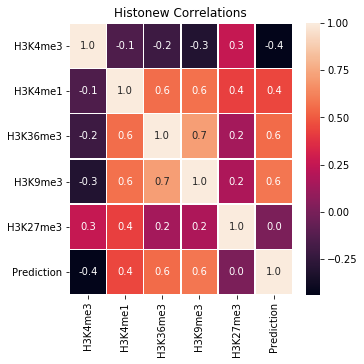

In [48]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(all_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Histonew Correlations')

In [49]:
fea = ['H3K4me3', 'H3K4me1', 'H3K36me3','H3K9me3',]
data_x = data_x[fea]

In [50]:
  forestModel = RandomForestClassifier()

In [51]:
parameters = [{'max_depth' : [1,2,3,4,5,6,10,20], 'n_estimators' : [1,2,3,4,5,10,20,30,40,50,60,70,80,100],
               'min_samples_leaf' : [0.01,0.02,0.03,0.005]}]
grid = GridSearchCV(forestModel,parameters,cv=3)
grid.fit(data_x, data_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 10, 20], 'n_estimators': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 100], 'min_samples_leaf': [0.01, 0.02, 0.03, 0.005]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.005, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
  forestModel = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.005, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
forestModel.fit(data_x, data_y)

ValueError: Number of labels=15485 does not match number of samples=3871

In [55]:
cross_validation_scores = cross_val_score(forestModel, data_x,data_y, cv=20 )
cross_validation_scores
print("Mean of cross validation scores: ")
np.mean(cross_validation_scores)

Mean of cross validation scores: 


0.8501067791743105

In [56]:
file_name_x= "test/x_test.csv"
data_x = pd.read_csv(file_name_x)
data_x = data_x.groupby(['GeneId']).mean()
data_x = pd.DataFrame(data_x).reset_index()
fea = ['H3K4me3', 'H3K4me1', 'H3K36me3','H3K9me3',]
data_x = data_x[fea]


In [57]:
y_predict = pd.DataFrame(forestModel.predict(data_x))
y_predict['Prediction'] = y_predict
#y_predict

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [38]:
file_name_submission= "submission.csv"
data_submission = pd.read_csv(file_name_submission)
data_submission

,GeneId,Prediction
0,1,0.0
1,2,1.0
2,3,1.0
3,4,0.0
4,5,0.0
5,6,1.0
6,7,0.0
7,8,0.0
8,9,1.0
9,10,0.0


In [39]:
data_submission['Prediction'] = y_predict['Prediction']
fea = ['GeneId', 'Prediction',]
data_submission = data_submission[fea]
data_submission

,GeneId,Prediction
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0
5,6,1
6,7,0
7,8,0
8,9,1
9,10,0


In [40]:
data_submission.to_csv("result_pivi.csv", index=False)